In [1]:
import gizmo_analysis as gizmo
import utilities as ut

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from astropy import units as u
from astropy import constants as cst

from aqn import *
from constants import *

Loaded constants script
Loaded AQN script


In [2]:
simulation_directory = 'FIRE/m12i_res7100'
part = gizmo.io.Read.read_snapshots('all', 'redshift', 0, simulation_directory)


# in utilities.simulation.Snapshot():
* reading:  FIRE/m12i_res7100/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  FIRE/m12i_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark', 'dark2', 'gas', 'star']

* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

* reading cosmological parameters from:  FIRE/m12i_res7100/initial_condition/ic_agora_m12i.conf

* checking sanity of particle properties

  cannot read file containing hosts coordinates
  instead will assign hosts via iterative zoom on particle mass

# in utilities.p

In [3]:
cube_length       = 20
voxel_resolution  = 2**8

voxel_length = cube_length / voxel_resolution * u.kpc
voxel_volume = voxel_length**3

In [4]:
coords = part['dark'].prop('host.distance')

bins = np.linspace(-cube_length/2,cube_length/2,voxel_resolution+1)
bin_centers = (bins[1:] + bins[:-1])/2

count, voxel_coords = np.histogramdd(coords, bins=(bins,bins,bins), density=None, weights=None,
                                     range=[(-cube_length/2, cube_length/2),(-cube_length/2, cube_length/2),(-cube_length/2, cube_length/2)])

voxel_coords = np.array([bin_centers, bin_centers, bin_centers])

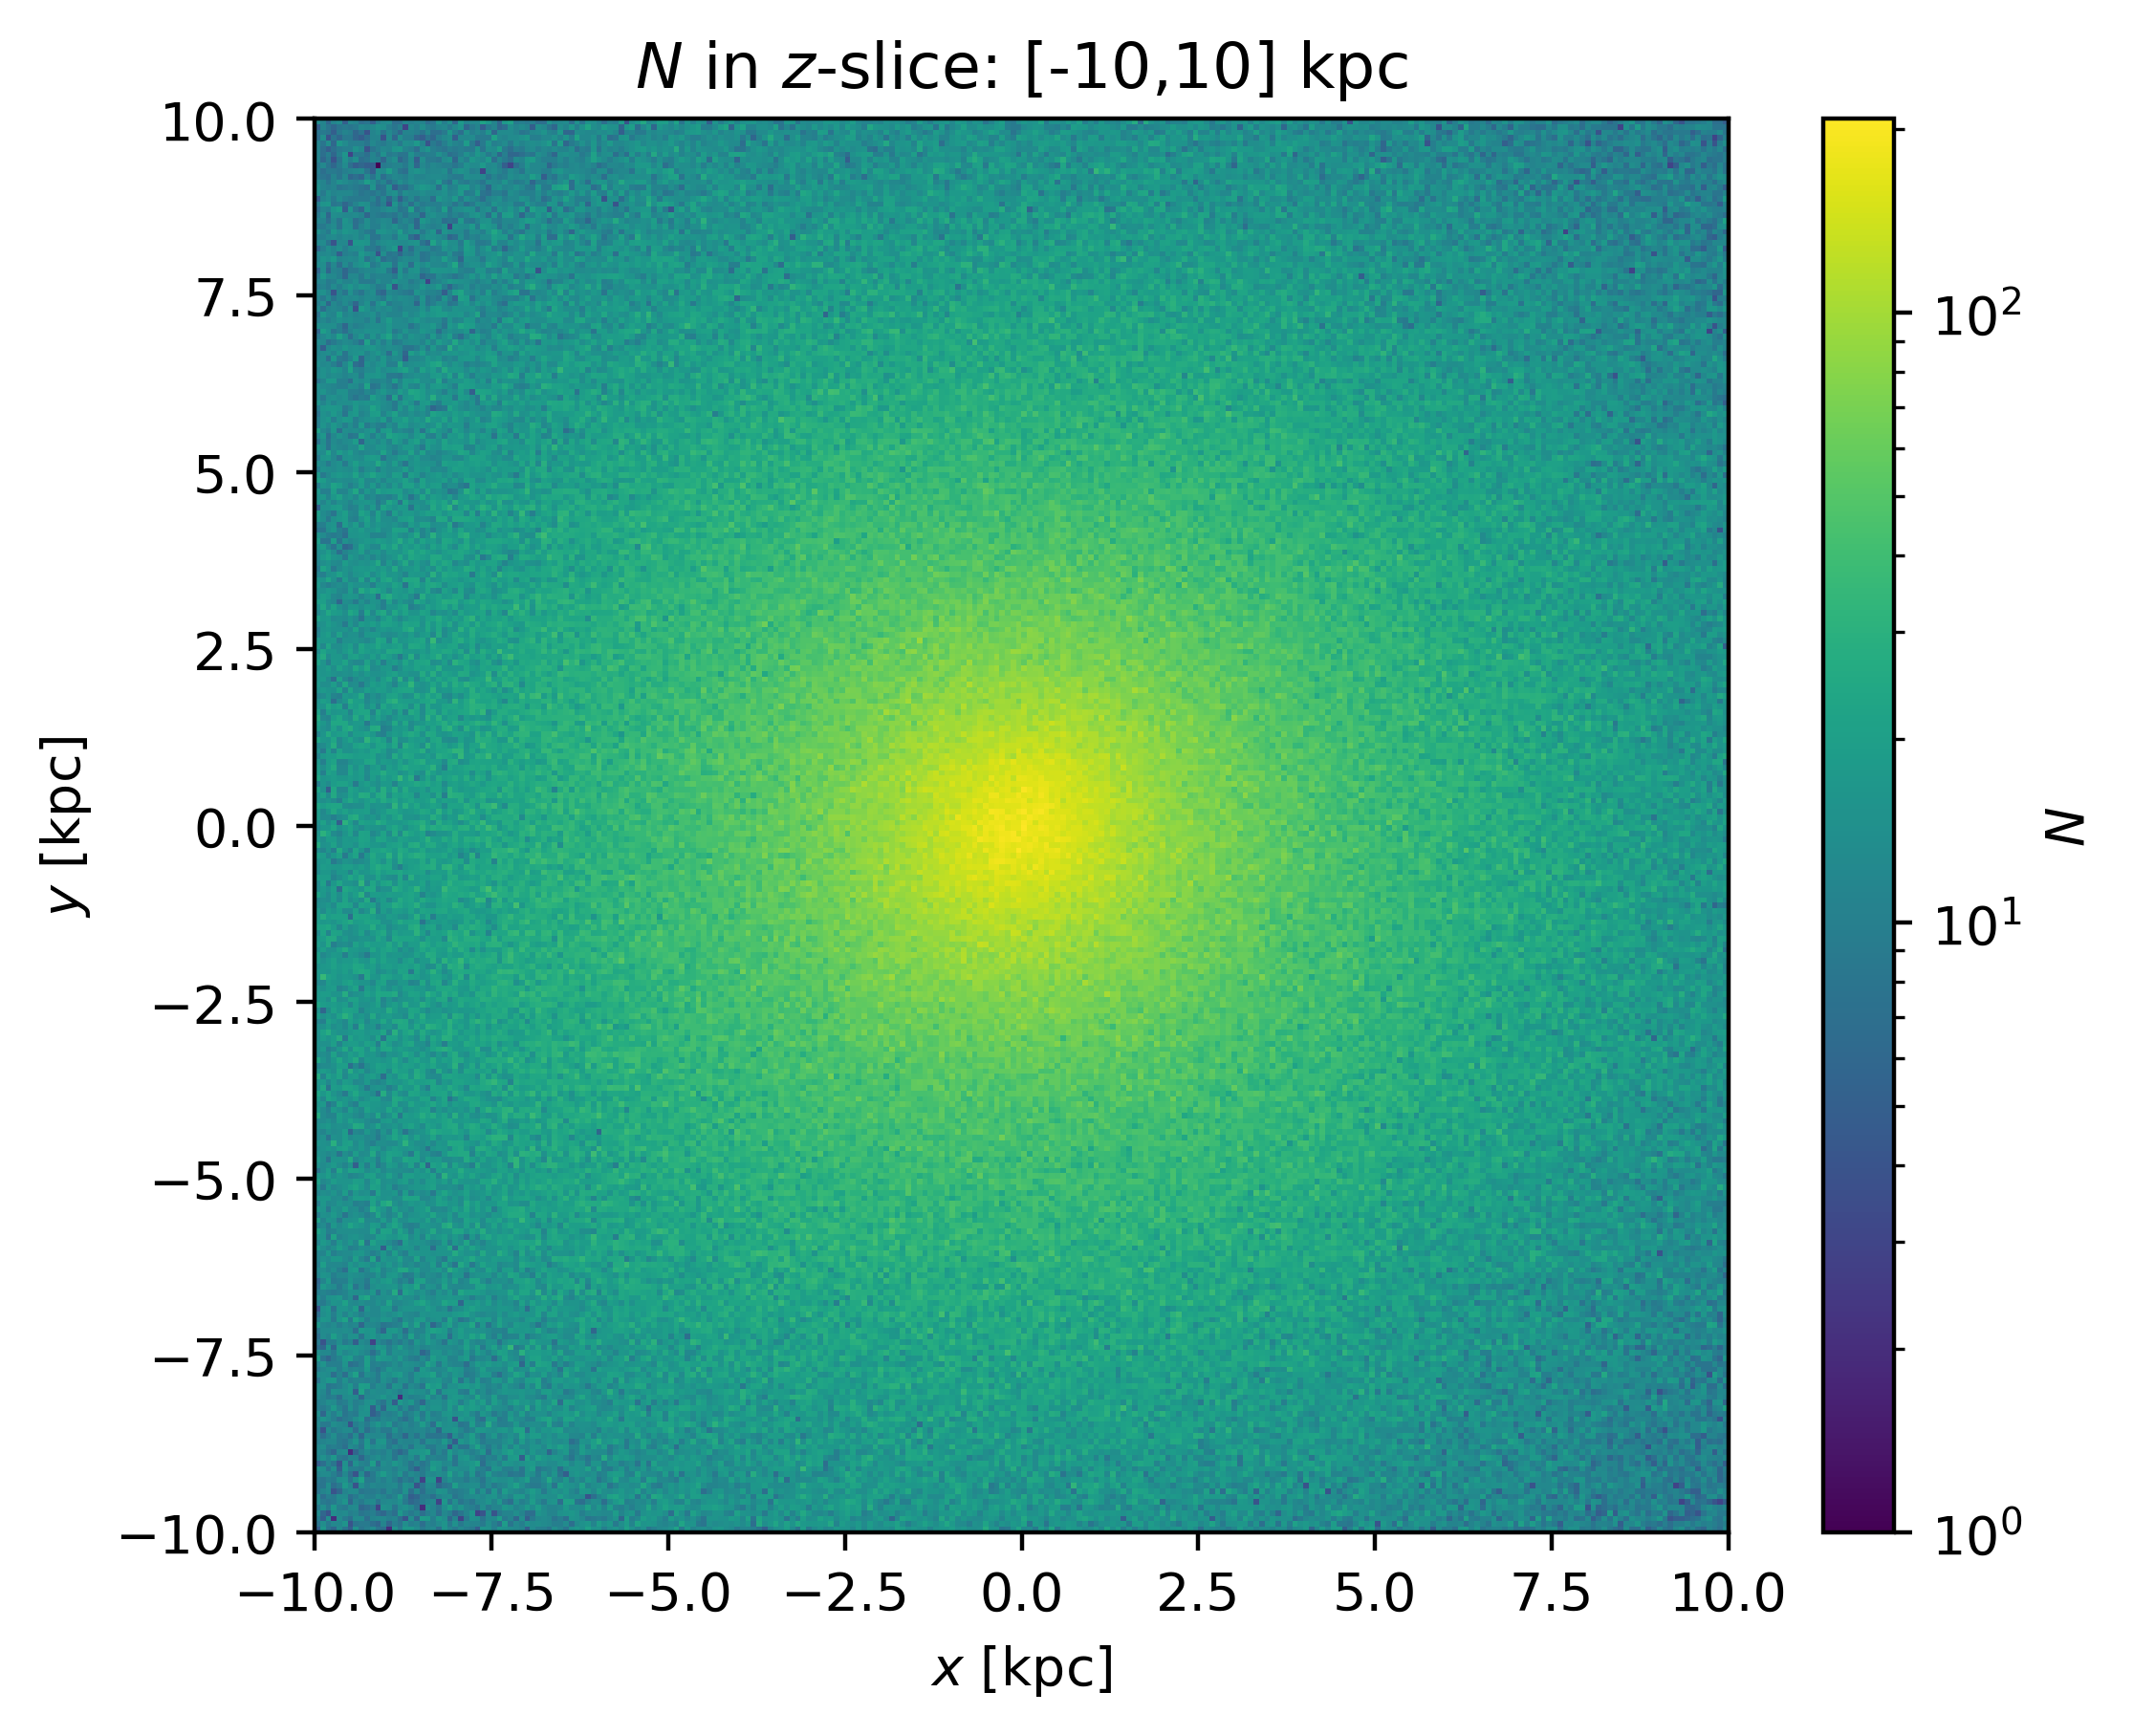

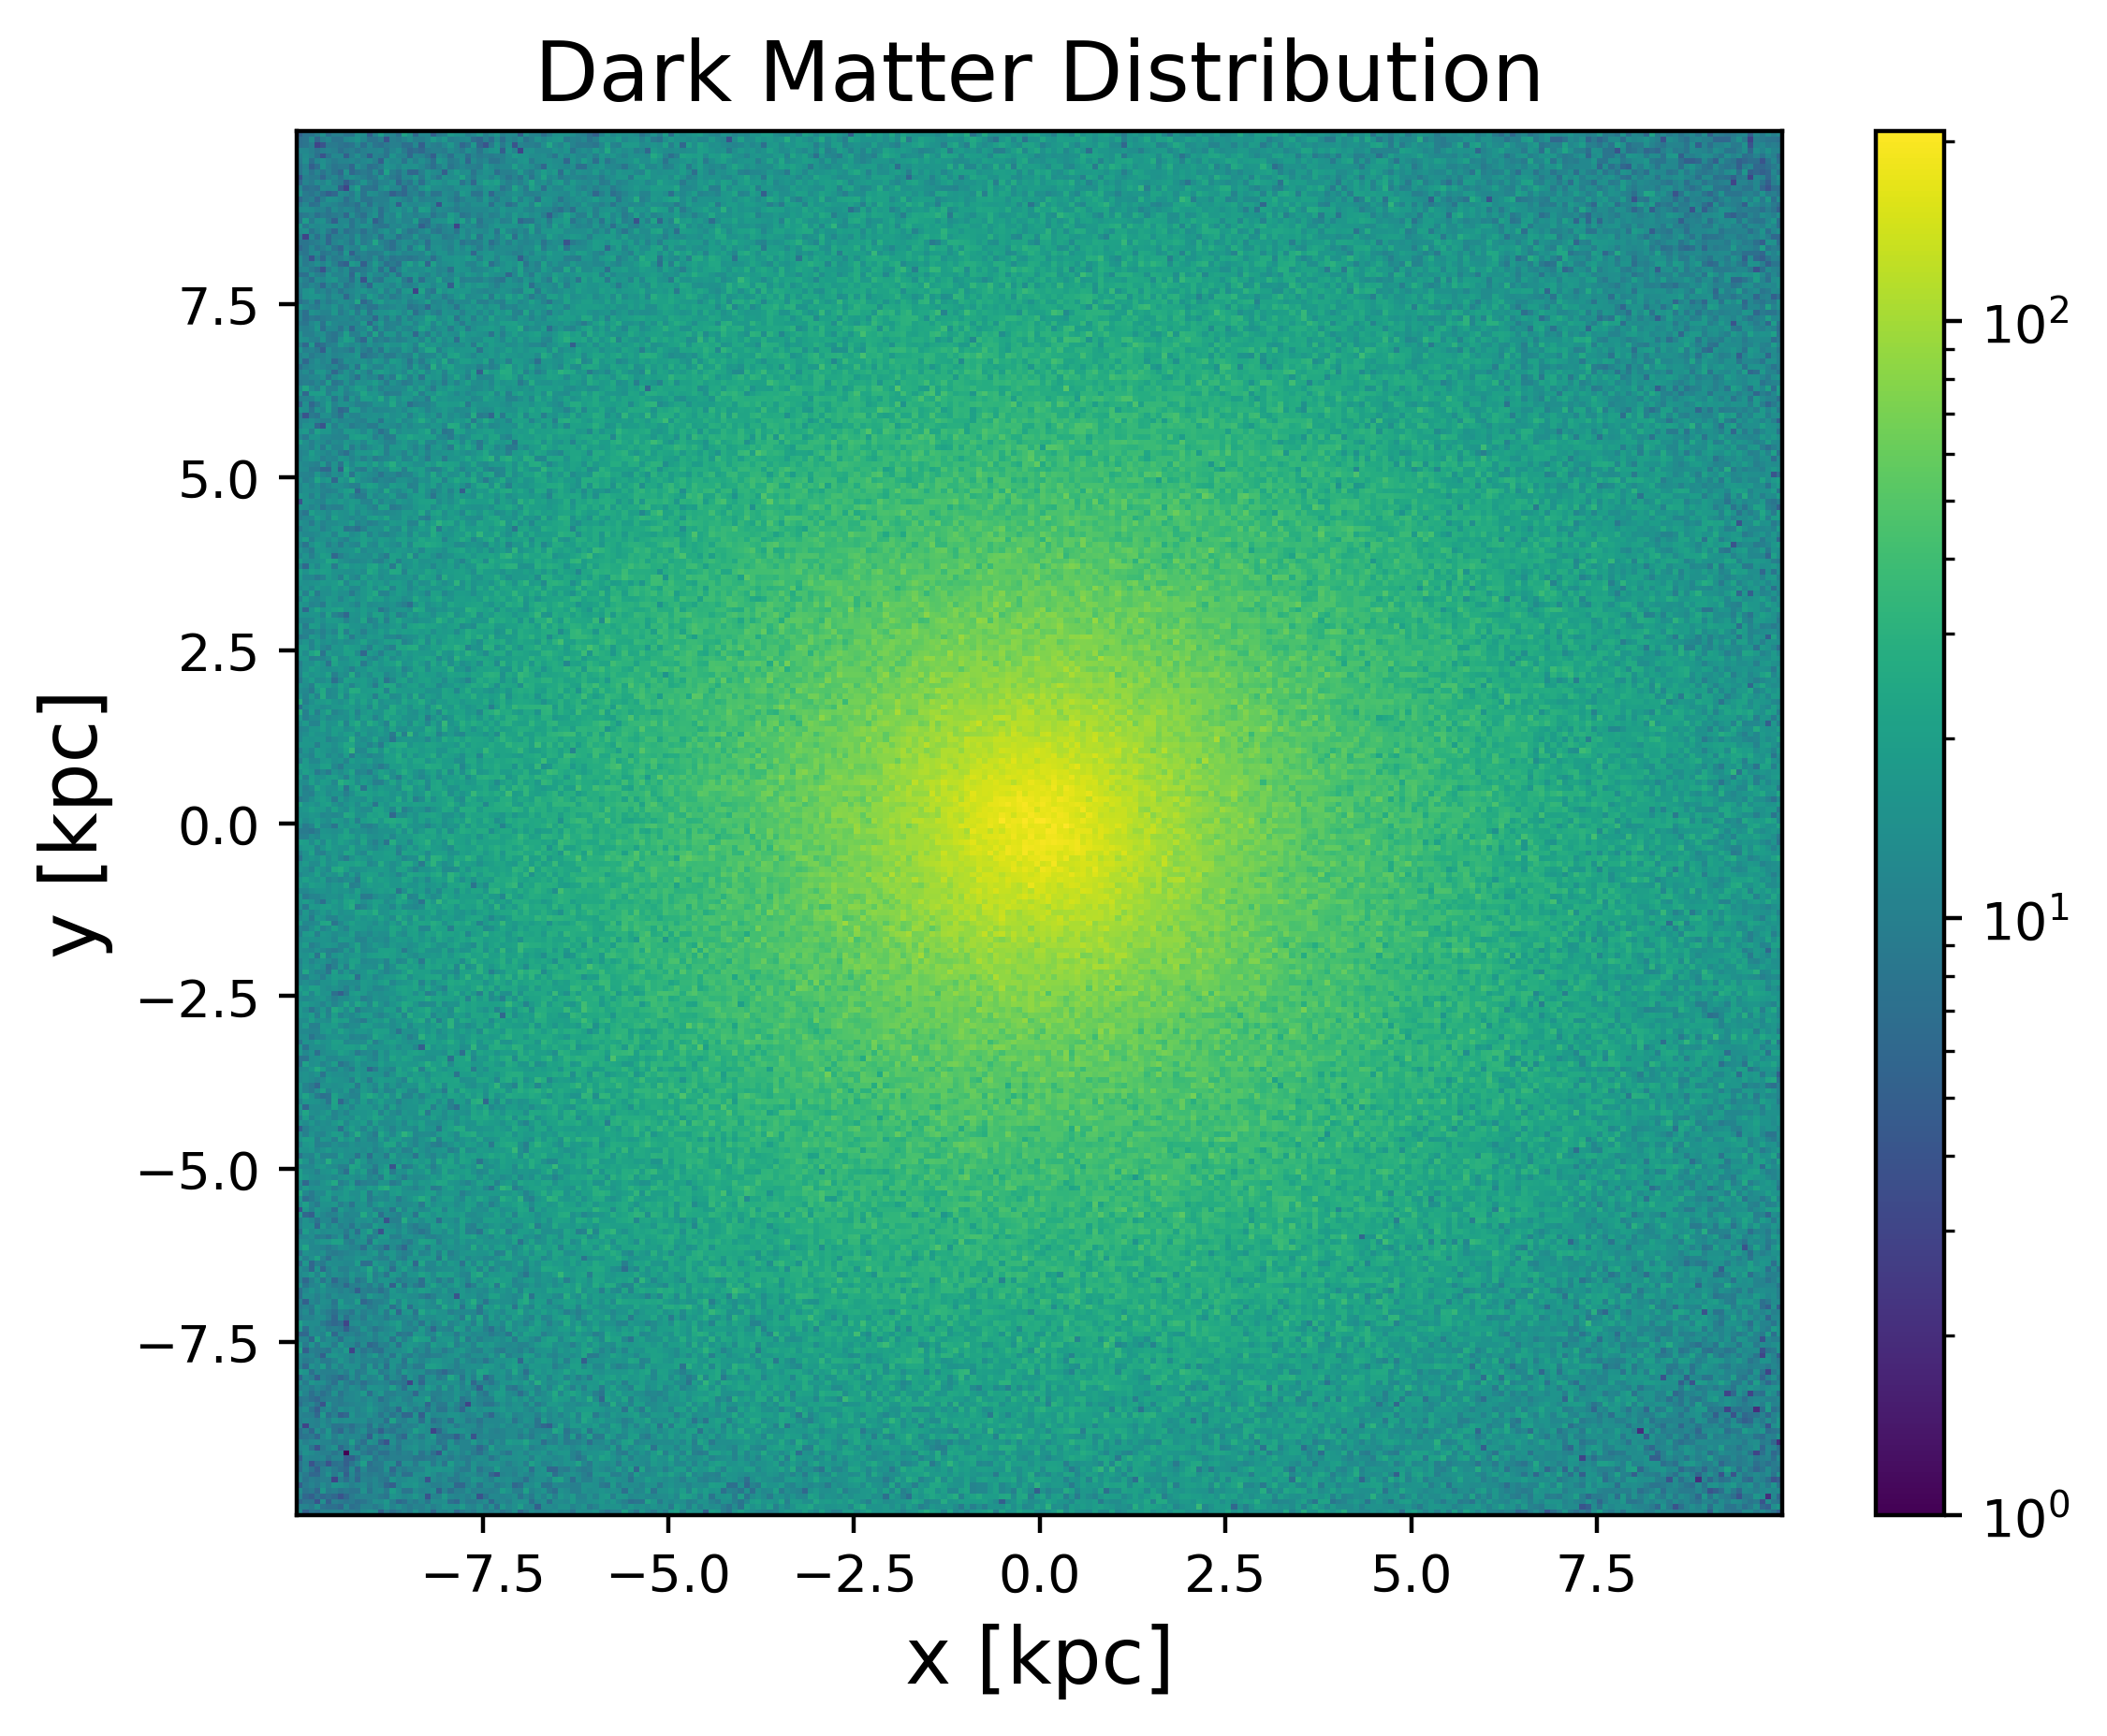

0.0


In [196]:
perform_sanity_check = True

if perform_sanity_check:
    z_slice_min, z_slice_max = [-10,10]
    mask = (voxel_coords[2] >= z_slice_min) & (voxel_coords[2] < z_slice_max)
    slice_count = np.sum(count[:,:,mask], axis=2)

    plt.figure(dpi=400)
    plt.imshow(slice_count, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm())
    plt.colorbar(label='$N$')
    plt.xlabel('$x$ [kpc]')
    plt.ylabel('$y$ [kpc]')
    plt.title(f"$N$ in $z$-slice: [{z_slice_min},{z_slice_max}] kpc")
    plt.show()

    ##############################################################################

    cube_coords = coords[np.where(np.abs(coords[:,0]) < cube_length/2)]
    cube_coords = cube_coords[np.where(np.abs(cube_coords[:,1]) < cube_length/2)]
    cube_coords = cube_coords[np.where(np.abs(cube_coords[:,2]) < cube_length/2)]
    
    fig = plt.figure(dpi=400)
    ax = plt.gca()
    histo = ax.hist2d(cube_coords[:,0],
             cube_coords[:,1],
             bins = 256,
             norm = matplotlib.colors.LogNorm())
    fig.colorbar(histo[3], ax=ax)

    ax.set_xlabel("x [kpc]",size=15)
    ax.set_ylabel("y [kpc]",size=15)
    ax.set_title("Dark Matter Distribution", size=16)

    plt.show()

    print(np.sum(slice_count - histo[0]))

In [216]:
mass  = (np.average(part['dark'].prop('mass')) * u.solMass).to(u.kg)
m_aqn = 0.01 * u.kg

rho_dm = count * mass / voxel_volume.to(u.m**3) 
n_aqn = rho_dm / m_aqn

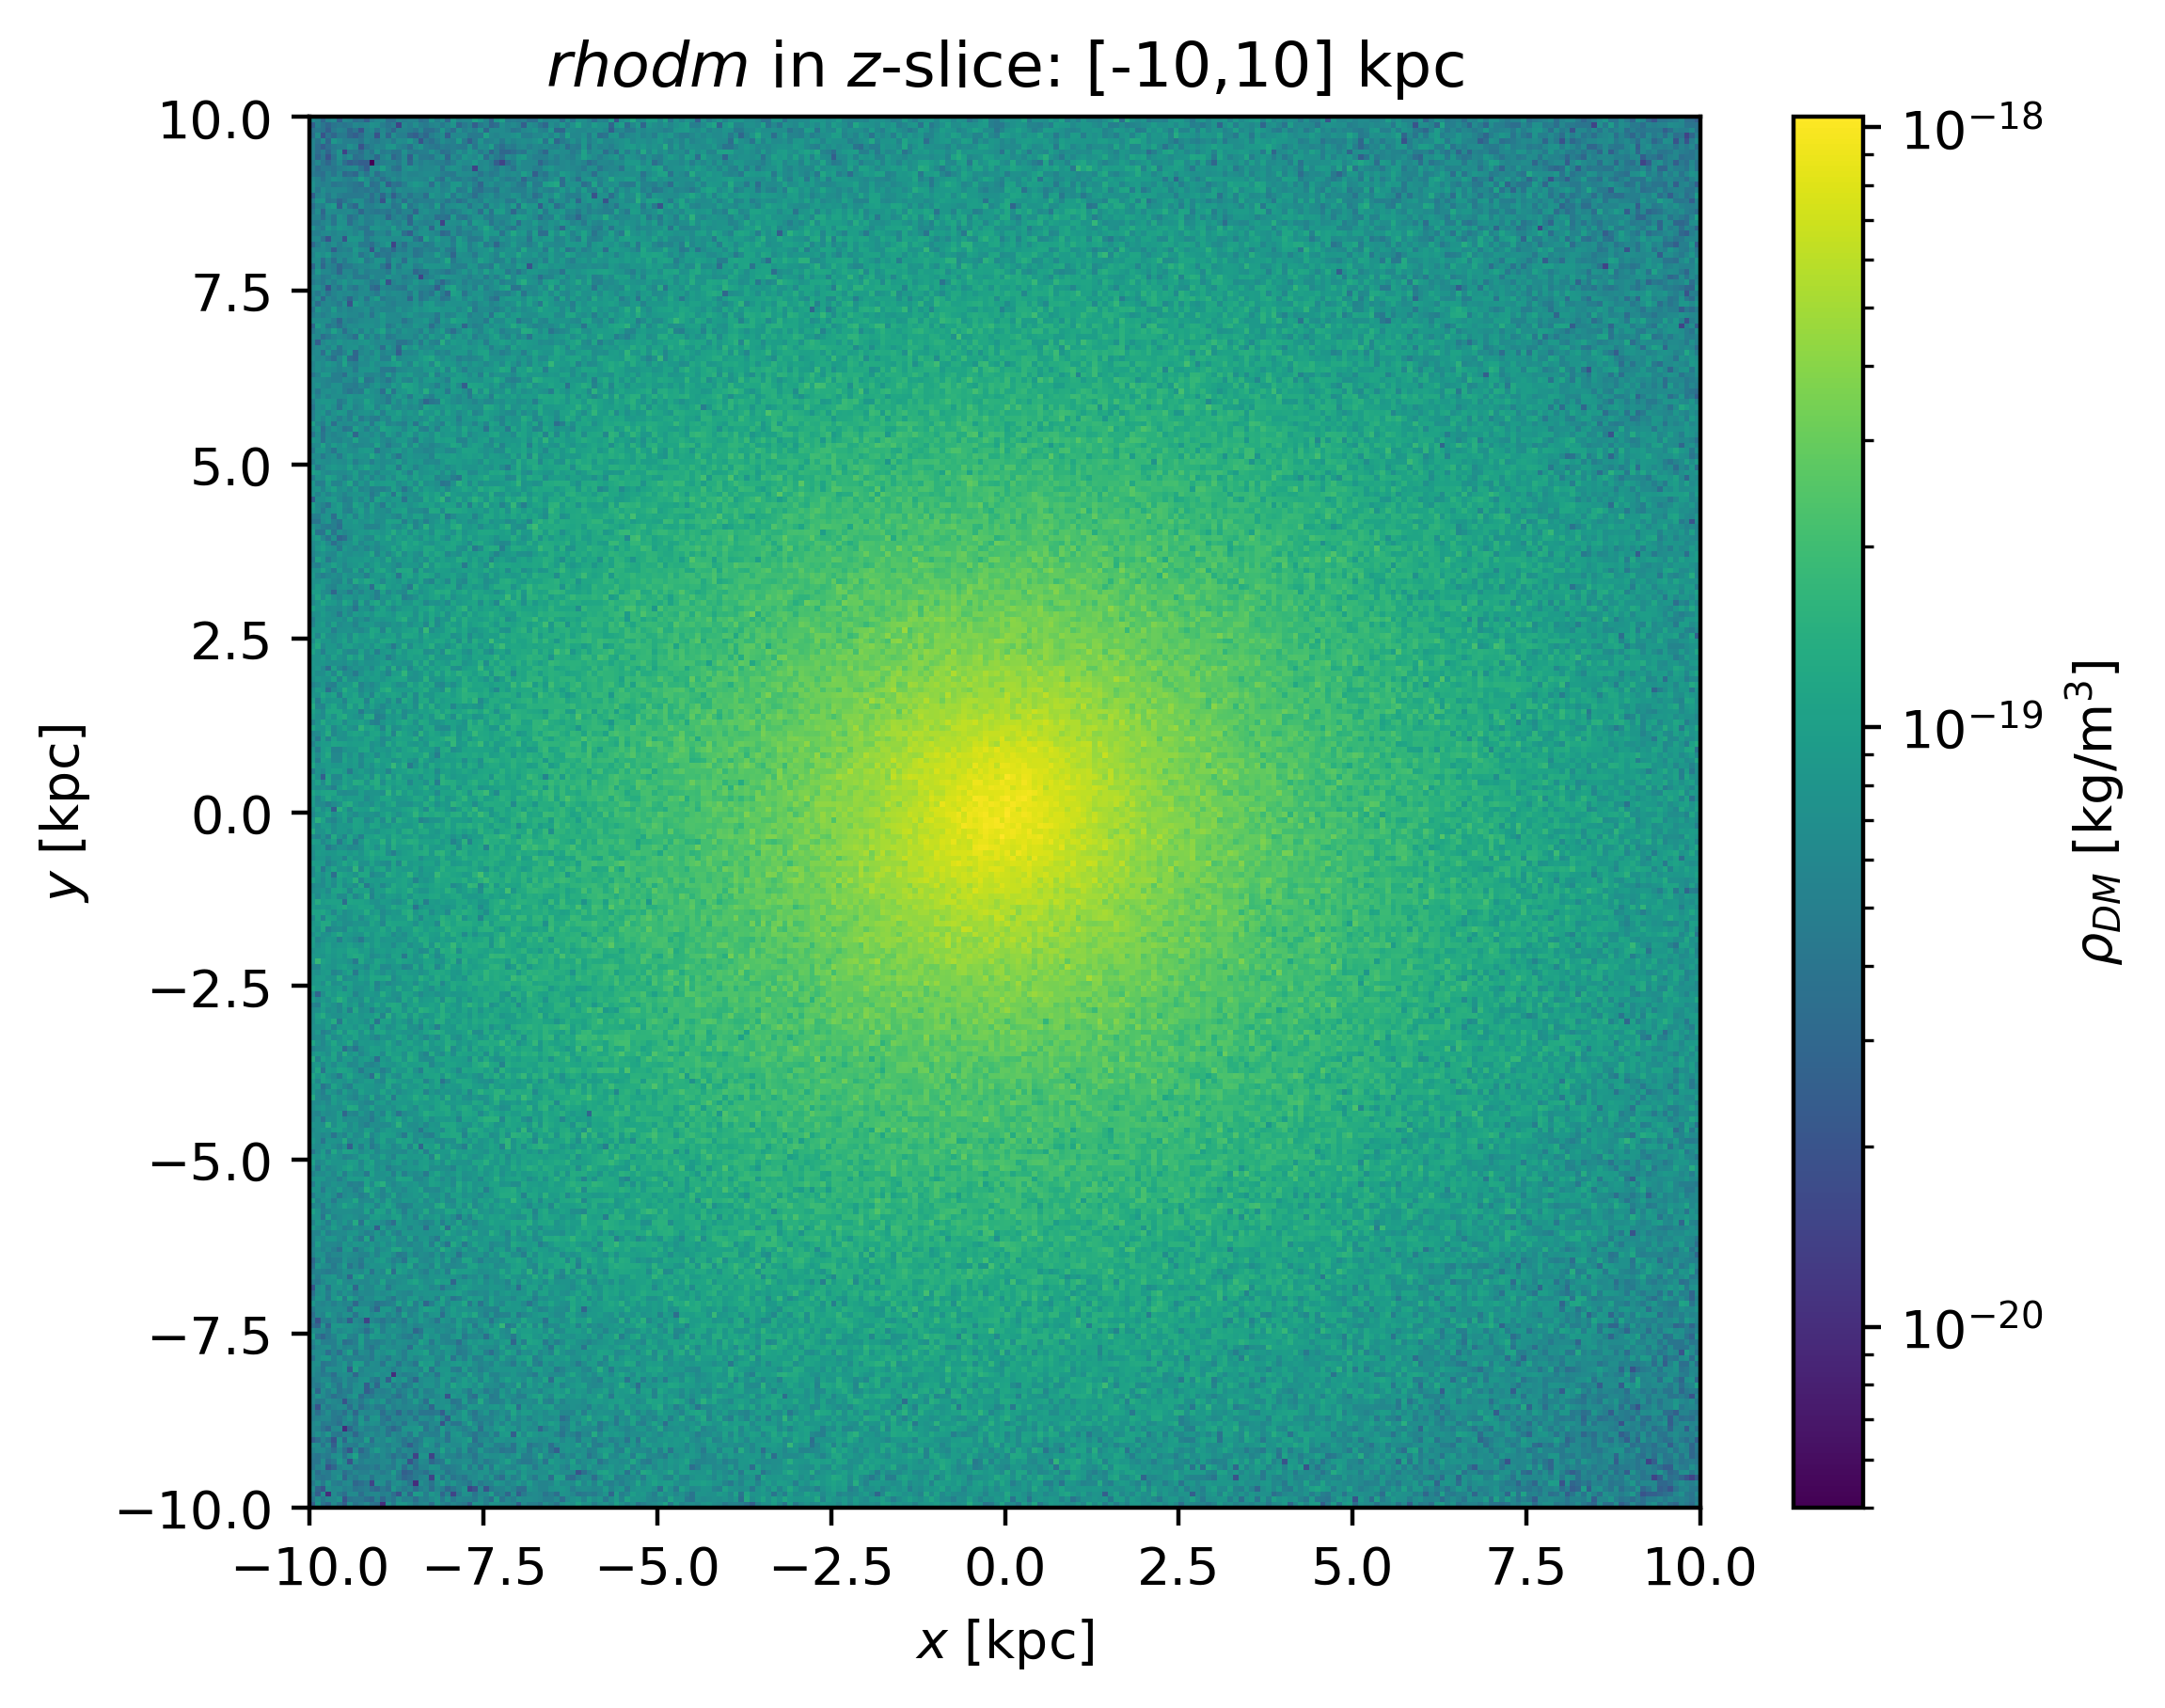

In [235]:
z_slice_min, z_slice_max = [-10,10]
mask = (voxel_coords[2] >= z_slice_min) & (voxel_coords[2] < z_slice_max)
slice_count = np.sum(rho_dm[:,:,mask], axis=2)

plt.figure(dpi=400)
plt.imshow(slice_count, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm())
plt.colorbar(label='$\\rho_{DM}$ [kg/m$^3$]')
plt.xlabel('$x$ [kpc]')
plt.ylabel('$y$ [kpc]')
plt.title(f"$rhodm$ in $z$-slice: [{z_slice_min},{z_slice_max}] kpc")
# plt.title()
plt.show()